# Demo for the DoWhy causal API
We show a simple example of adding a causal extension to any dataframe. 

In [1]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [2]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

,W0,v0,y
0,-1.294864,False,-2.591832
1,-1.364902,False,0.096660
2,0.416330,True,4.582538
3,-1.016698,False,-1.522857
4,-0.880081,True,4.235542
...,...,...,...
995,0.368889,True,6.060552
996,0.989875,True,5.562653
997,-1.885617,False,-2.530255
998,-0.955594,True,4.839297


<AxesSubplot:xlabel='v0'>

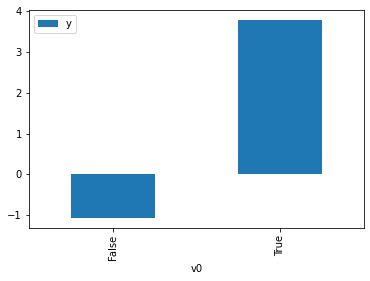

In [3]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause],
                     proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

<AxesSubplot:xlabel='v0'>

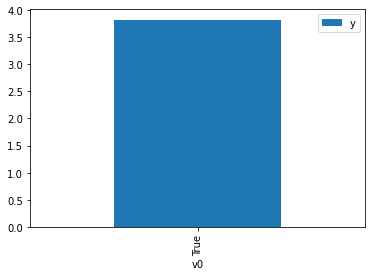

In [4]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [5]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


In [6]:
cdf_0

,W0,v0,y,propensity_score,weight
0,-0.476165,False,-0.623095,0.673826,1.484062
1,0.549599,False,0.914181,0.246227,4.061285
2,-0.760998,False,-0.190339,0.775161,1.290054
3,-1.700690,False,-1.213734,0.949180,1.053541
4,0.753456,False,1.811265,0.184616,5.416645
...,...,...,...,...,...
995,-2.270350,False,-3.436057,0.981138,1.019224
996,-1.030239,False,-0.029662,0.848360,1.178745
997,-2.631287,False,-2.545266,0.990054,1.010046
998,0.619348,False,0.750938,0.223697,4.470326


In [7]:
cdf_1

,W0,v0,y,propensity_score,weight
0,-0.612761,True,4.376039,0.274651,3.640978
1,-1.600940,True,1.750087,0.060203,16.610565
2,-0.983826,True,3.921403,0.162691,6.146638
3,-0.119924,True,5.541541,0.478762,2.088721
4,-2.805845,True,0.515814,0.007286,137.241700
...,...,...,...,...,...
995,-1.421222,True,3.552183,0.081301,12.300034
996,-2.169013,True,4.615345,0.022546,44.352872
997,-0.983826,True,3.921403,0.162691,6.146638
998,-0.954808,True,4.282011,0.169924,5.884997


## Comparing the estimate to Linear Regression
First, estimating the effect using the causal data frame, and the 95% confidence interval.

In [8]:
(cdf_1['y'] - cdf_0['y']).mean()

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

In [9]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/python3.8/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/amshar/python-environments/vpy38/lib/pyth

Comparing to the estimate from OLS.

In [10]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              4416.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:24:54   Log-Likelihood:                         -1430.1
No. Observations:                1000   AIC:                                      2864.
Df Residuals:                     998   BIC:                                      2874.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1156      0.024     45.924      0.000       1.068       1.163
x2             5.0400      0.061     82.563      0.000       4.920       5.160
==============================================================================
Omnibus:                        1.448   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.460
Skew:                           0.093   Prob(JB):                        0.482
Kurtosis:                       2.972   Cond. No.                         2.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""